In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


>- We don't have null values

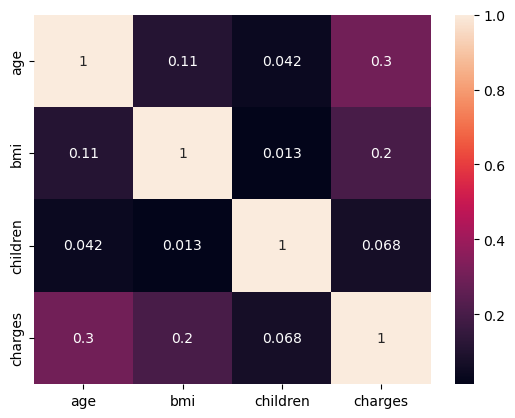

In [4]:
sns.heatmap(df.corr(),annot=True)
plt.show()

>- As we see that the age is the most important  numeric feature that affects the charges

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Handling Outliers using z-score in continous features

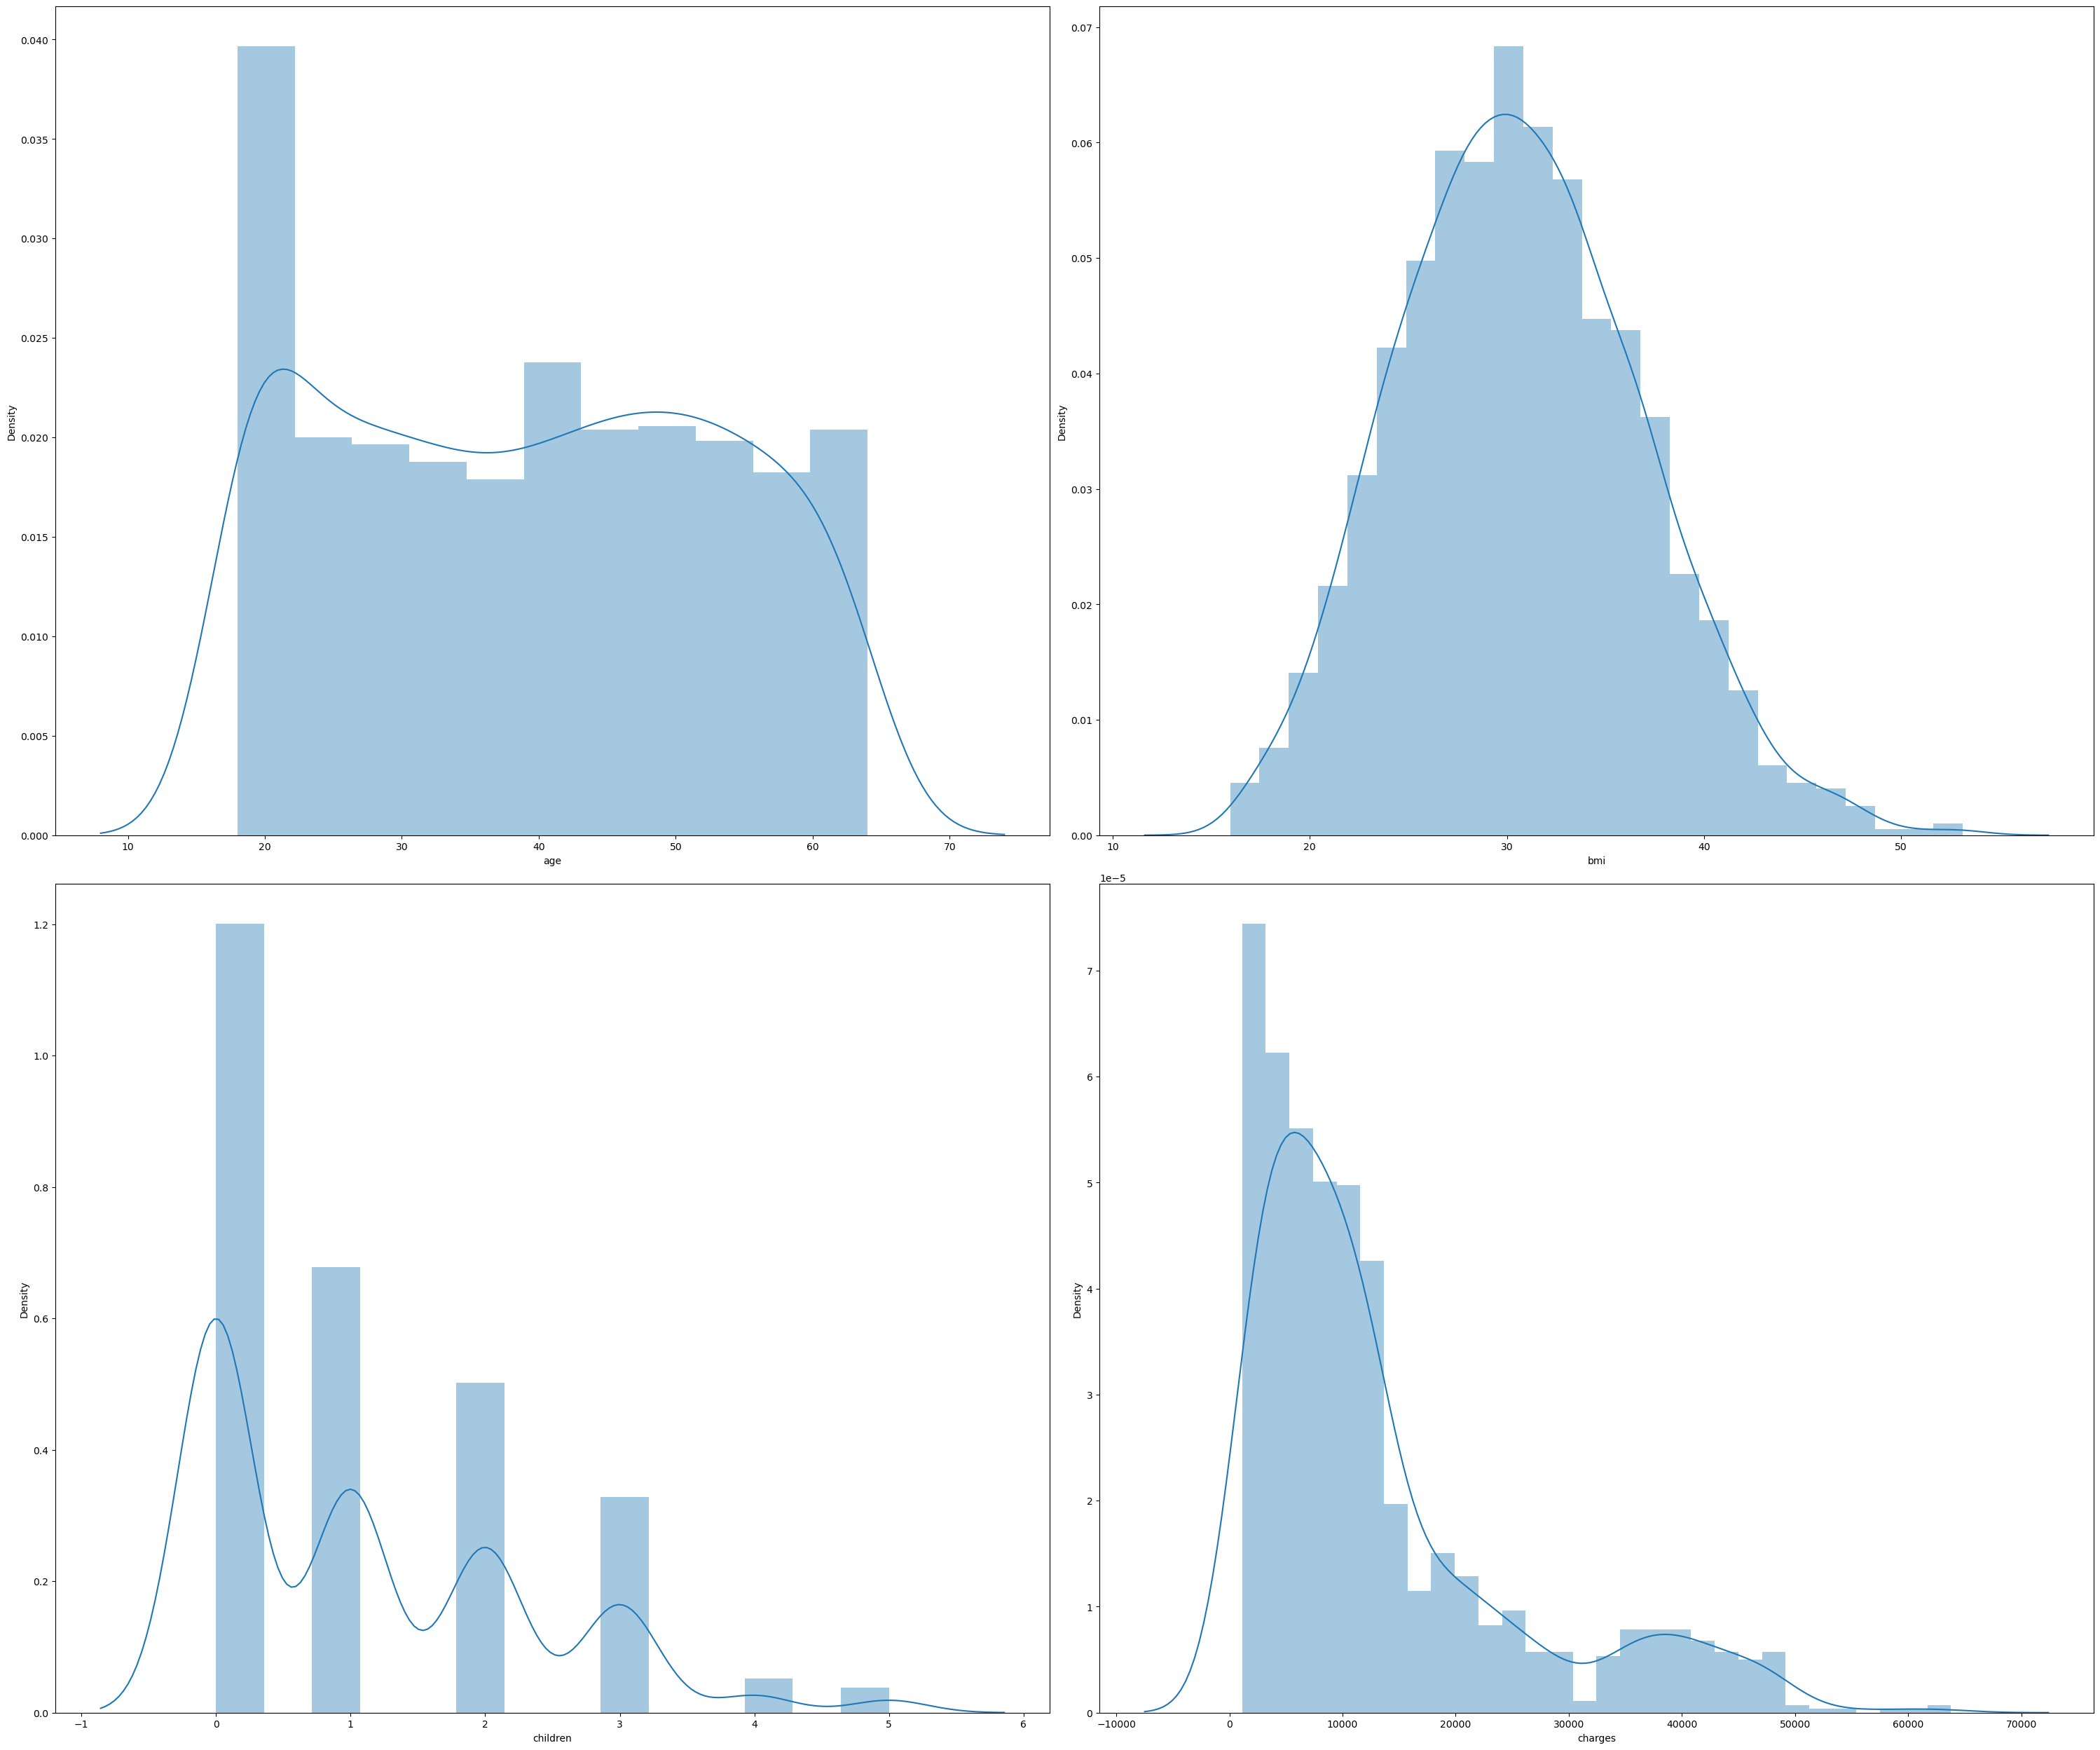

In [6]:
i=1
plt.figure(figsize=(30,25))
for col in df.columns:
   if df[col].dtype!='object':
     plt.subplot(2,2,i)
     sns.distplot(df[col])
     i+=1
plt.tight_layout(pad=0.8)
plt.show()     

>- We can handle BMI,age outliers using Z-score due to its normal distribution

In [7]:
def check_outliers(col,df):
  mean = df[col].mean()
  st = df[col].std()
  lower_b=mean-3*st
  upper_b=mean+3*st
  outliers=[]
  for i in range(len(df)):
    if df.loc[i,col]<lower_b or df.loc[i,col]>upper_b :
      outliers.append(df.loc[i,col])
  return outliers


In [8]:
check_outliers('age',df)

[]

### Conclusion
>- There is no outliers in age column

In [9]:
check_outliers('bmi',df)

[49.06, 50.38, 52.58, 53.13]

>- They are  natural outliers due to very obessed persons

In [10]:
def handle_outliers(col,df):
    mean=df[col].mean()
    st=df[col].std()   
    lower_b=mean-3*st
    upper_b=mean+3*st
    
    for i in range(len(df)):
        if df.loc[i,col]>upper_b :
                df.loc[i,col]=upper_b
        elif df.loc[i,col]<lower_b:
            df.loc[i,col]=lower_b

In [11]:
handle_outliers('bmi',df)

In [12]:
check_outliers('bmi',df)

[48.95795759602359, 48.95795759602359, 48.95795759602359, 48.95795759602359]

### Conclusion
>- we handled outliers in bmi column

# Explatory Data Analysis

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
def plot_value_counts(df,column_name,normalize = True,n_max_categories = 10):
  if df[column_name].nunique() > n_max_categories :
    return
  ax = df[column_name].value_counts(normalize = normalize).plot(kind ='bar')
  ax.set_title(column_name)
  plt.show()    

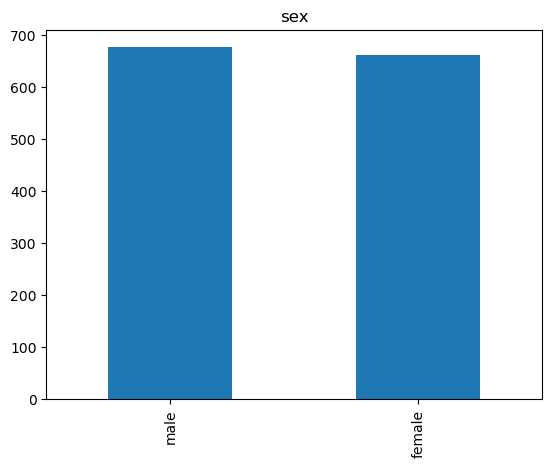

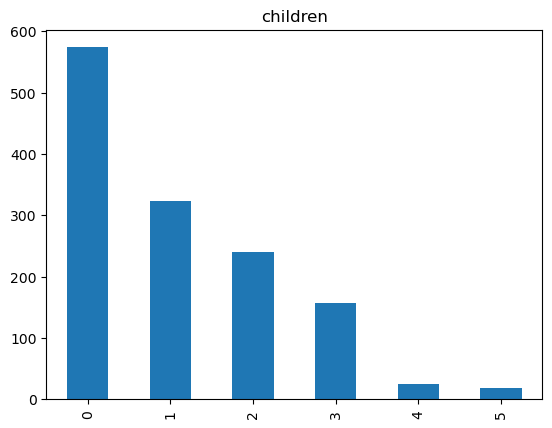

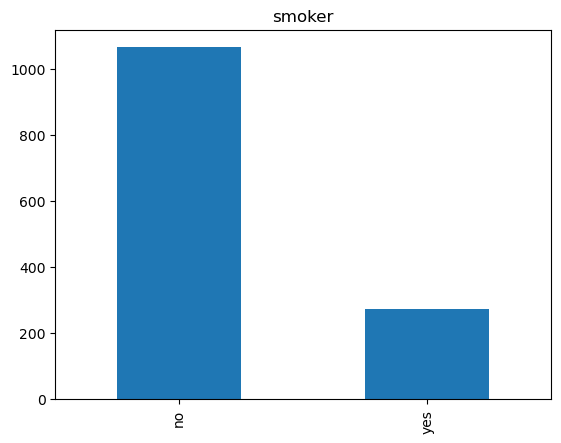

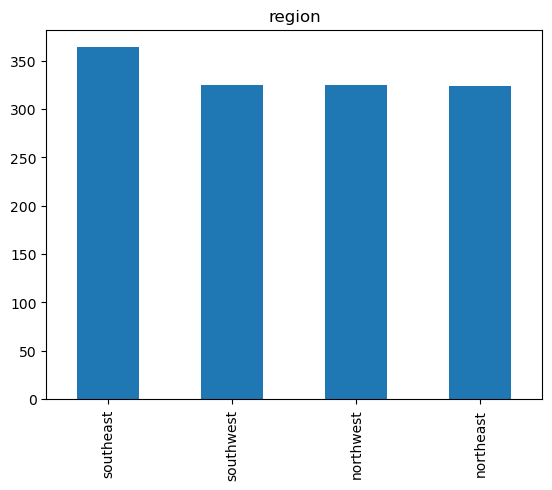

In [15]:
for col in df.columns :
  plot_value_counts(df,col,False,8)  

>- From this EDA we have more non-smokers in the insurance.
>- and Most people that is included in insurance has 0 childern
>-  have males more than females slightly

## 1- Age

In [16]:
df['age'].nunique()

47

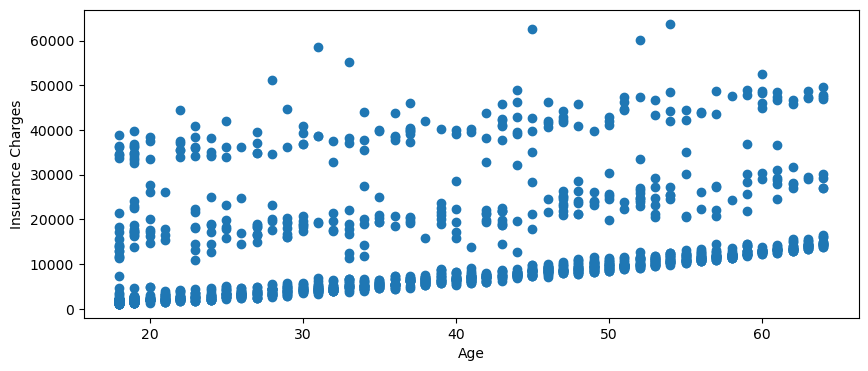

In [17]:
plt.figure(figsize=(10,4))
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

>- There is a linear relation between age and insurance cost 

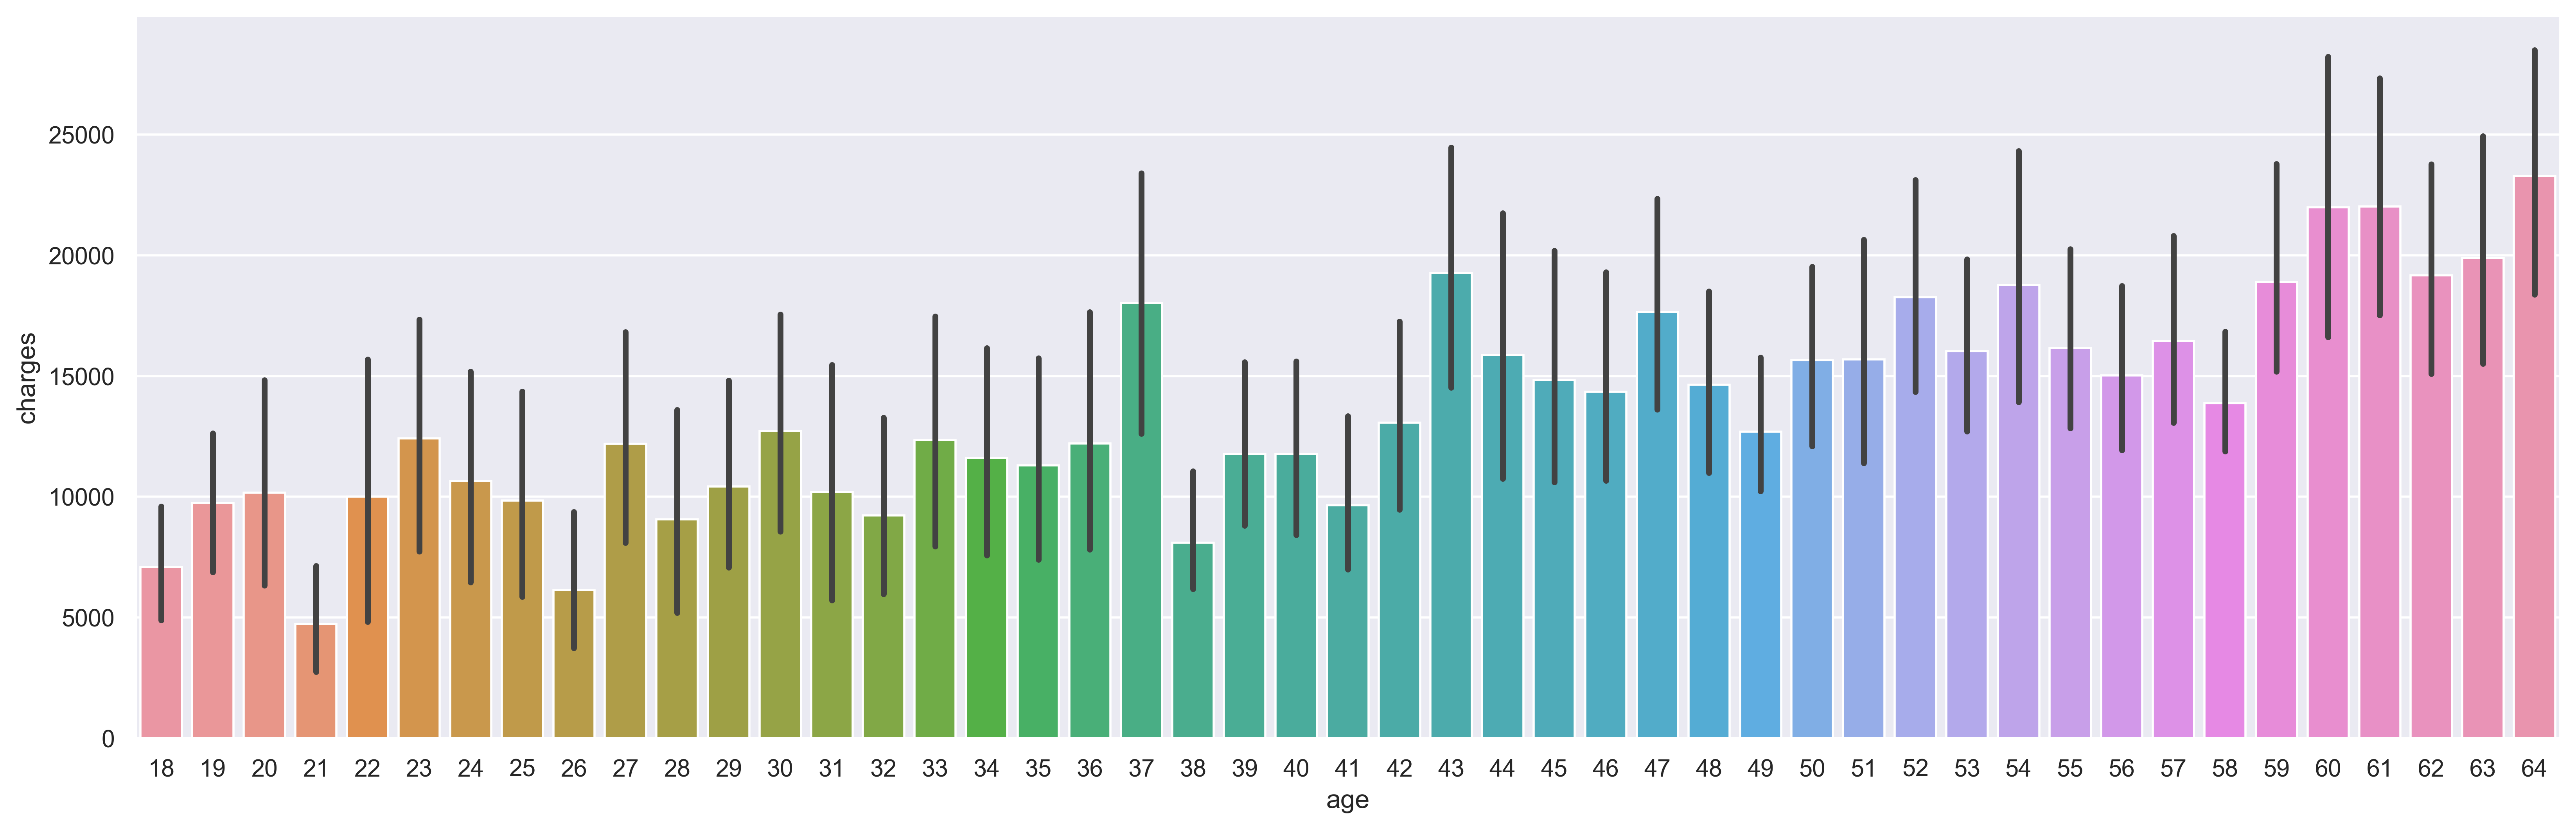

In [18]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.barplot( x = 'age', y = 'charges', data = df)
plt.show()

>- As we get older in age, we will likely have to visit medical centers,so the insurance increases


### What if the person is a smoker, Do the charges differ?

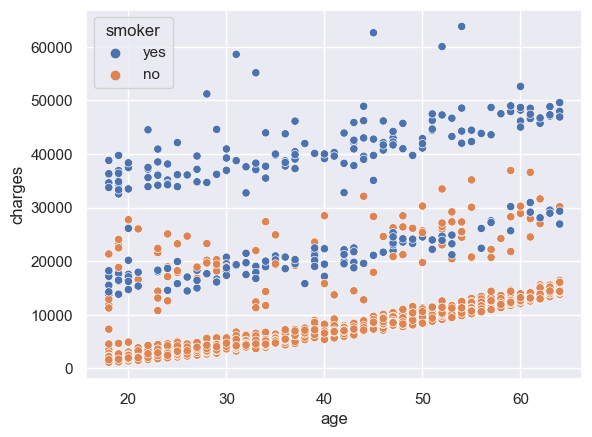

In [19]:
sns.scatterplot(x='age',y='charges',data =df,hue='smoker')
plt.show()

>- People that smokes pay a higher insurance cost than people that doesn't smoke
>- You'll most likely qualify for a medical plan despite your detrimental smoking habit. However, your insurer will charge you higher premiums than a non-smoker. The extra cost is legal as the Affordable Care Act allows insurers to raise coverage charges for smokers by up to 50%.

# What about region?

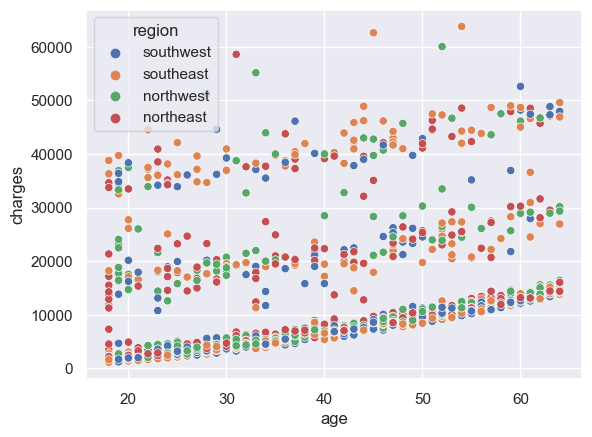

In [20]:
sns.scatterplot(x='age',y='charges',data =df,hue='region')
plt.show()

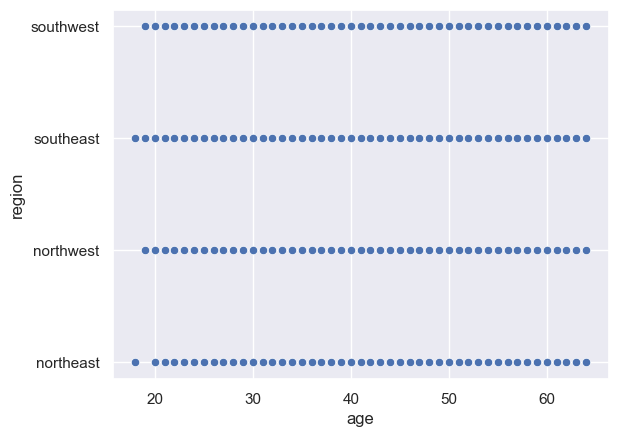

In [21]:
sns.scatterplot(x='age',y='region',data =df)
plt.show()

>- As we see the age and region are both independent Features

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


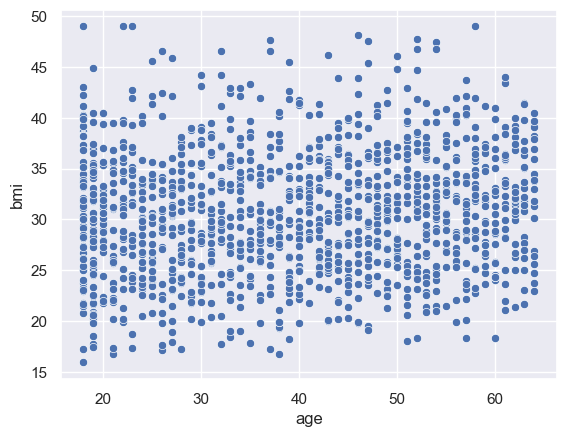

In [23]:
sns.scatterplot(x='age',y='bmi',data =df)
plt.show()

>- And also the body mass index is also independent with the age and so on for other features

## 2- BMI

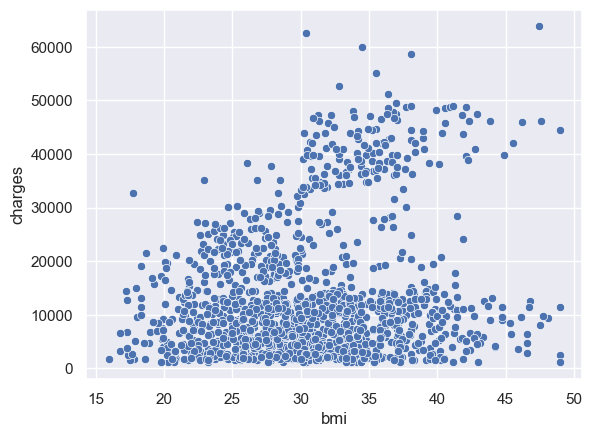

In [24]:
sns.scatterplot(x='bmi',y='charges',data =df)
plt.show()

>- The BMI doesn't have a real effect on insurance charges in this figure but there is a weak relation if the person is more obesed, he will get a higher insurance

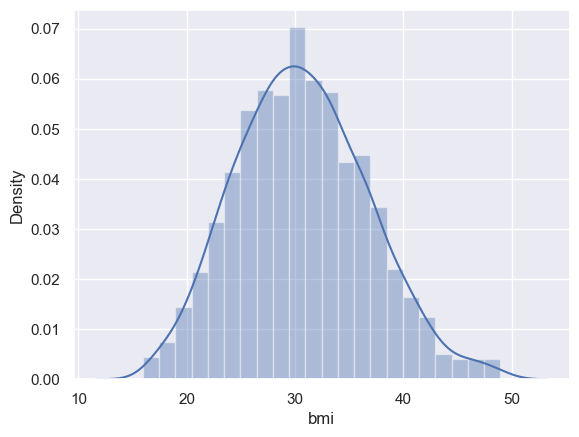

In [25]:
sns.distplot(df['bmi'])
plt.show()

>- With a value equal to 30 starts obesity. Let's start to explore! First, let's look at the distribution of costs in people with BMI greater than 30 and less than 30.

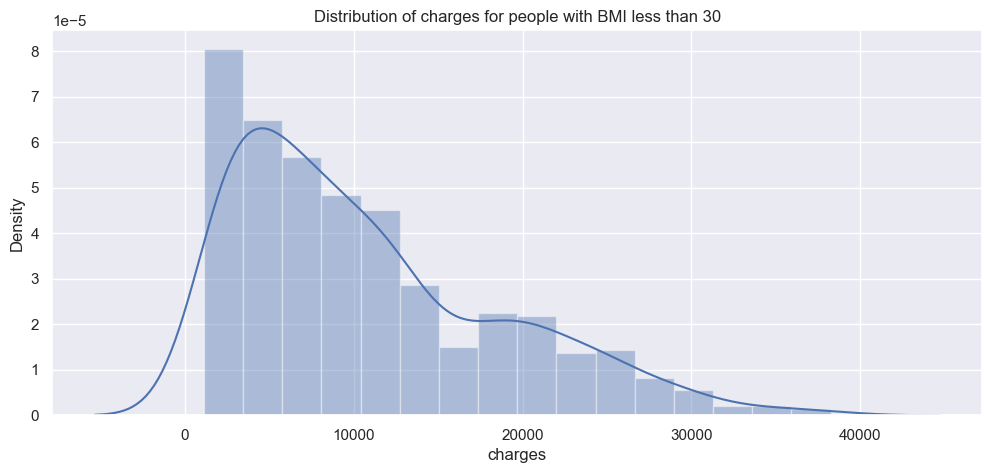

In [26]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for people with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

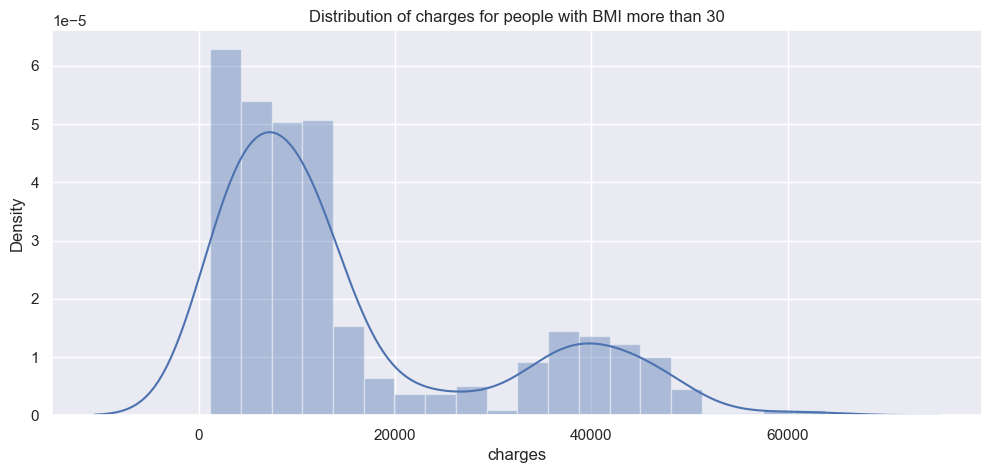

In [27]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for people with BMI more than 30")
ax = sns.distplot(df[(df.bmi > 30)]['charges'], color = 'b')

>- People with BMI above 30 will pay more insurance charges due to the probabilty of obesity problems 


# What about the number of children?


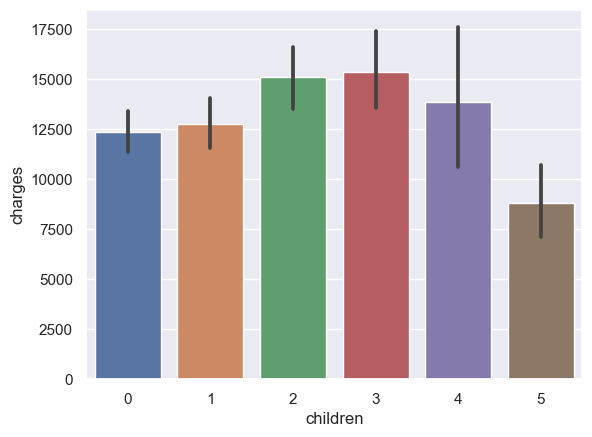

In [28]:
sns.barplot(x='children',y='charges',data =df)
plt.show()

>- As we see when you have more children your insurance cost will decrease
>- This is sometimes referred to as the “cheaper by the dozen” effect. Each additional child costs less because children can share a bedroom; a family can buy food in larger, more economical quantities; clothing and toys can be handed down; and older children can often babysit younger ones.
>- And this article is very useful about insurance rules in U.S 
https://www.ehealthinsurance.com/resources/individual-and-family/much-health-insurance-families-cost

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Turn Categorcal Data into numeric
>- First i will use label encoder for sex and smoker
>- second i will use one hot encoder for region to not biases one region to another

In [30]:
df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [31]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


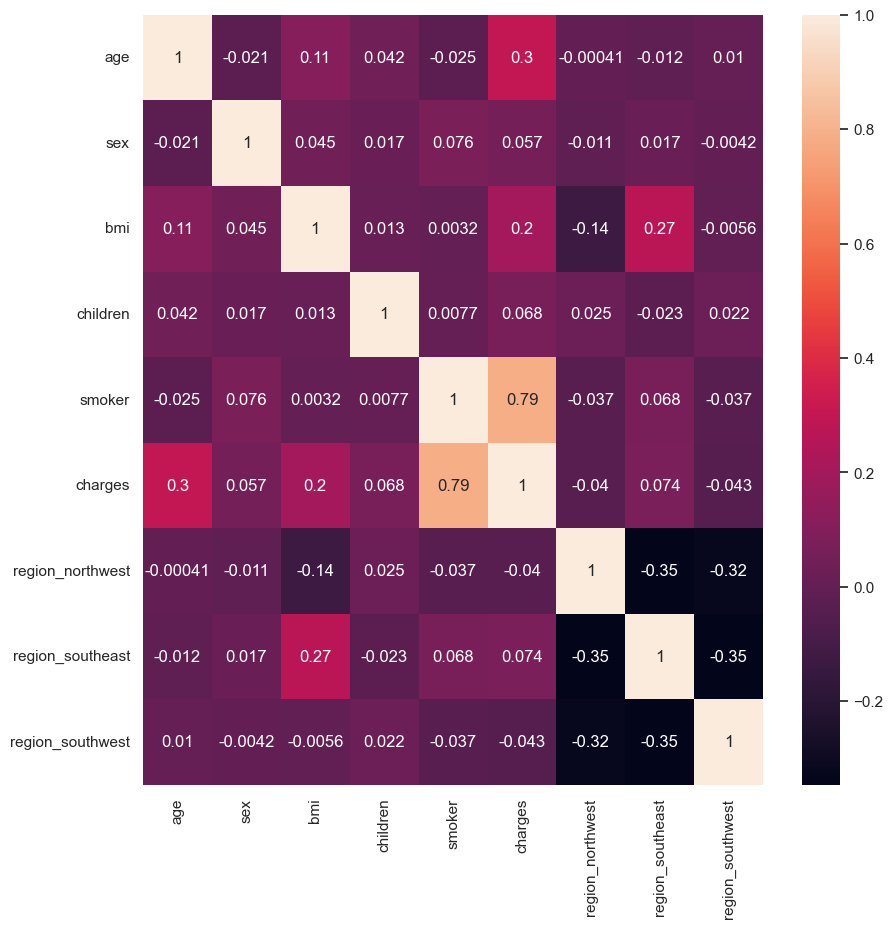

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot =True)
plt.show()


After converting categorical variables we conclude
>-  that The most effective features that increase the insurance is if the person is smoker then higher age

In [33]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# Machine Learning Part

In [34]:
# divide data into features and labels
X = df.drop('charges',axis=1).values
y = df['charges'].values



In [35]:
# divide the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [36]:
# apply normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

our data is small so we can use Linear Regression or Polynomial Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
y_pred_tr = model1.predict(X_train)
print('Root Mean Square Error for Simple Linear Regression :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score for Simple Linear Regression :',r2_score(y_test,y_pred))
print('###################\nCheck overfitting or underfitting\n')
print('Root Mean Square Error for Simple Linear Regression (training) :',np.sqrt(mean_squared_error(y_train,y_pred_tr)))
print('R2 score for Simple Linear Regression (training) :',r2_score(y_train,y_pred_tr))


Root Mean Square Error for Simple Linear Regression : 6439.872874548872
R2 score for Simple Linear Regression : 0.7360189550036854
###################
Check overfitting or underfitting

Root Mean Square Error for Simple Linear Regression (training) : 5941.705498316066
R2 score for Simple Linear Regression (training) : 0.7544606277699102


>- The Simple Linear Regression is not bad it is reasonably good for this dataset

>- We can improve our model by regularization so we will use Lasso Regression model
>- We wouldn't use Ridge model because all features are important for us

In [38]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha = 30,max_iter=1000000)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
y_pred_tr = model2.predict(X_train)
print('Root Mean Square Error for Lasso Linear Regression :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score for Lasso Linear Regression :',r2_score(y_test,y_pred))
print('###################\nCheck overfitting or underfitting\n')
print('Root Mean Square Error for Lasso Linear Regression (training) :',np.sqrt(mean_squared_error(y_train,y_pred_tr)))
print('R2 score for Lasso Linear Regression (training) :',r2_score(y_train,y_pred_tr))



Root Mean Square Error for Lasso Linear Regression : 6446.275815276299
R2 score for Lasso Linear Regression : 0.7354937597714274
###################
Check overfitting or underfitting

Root Mean Square Error for Lasso Linear Regression (training) : 5942.472901091465
R2 score for Lasso Linear Regression (training) : 0.7543971982498897


>- After Tuning the hyperparameter we can't see a big difference between simple linear regression and lasso

In [39]:
from sklearn.preprocessing import PolynomialFeatures
d=3
poly = PolynomialFeatures(degree=d,include_bias=False)
X_poly_train=poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
model3 = LinearRegression()
model3.fit(X_poly_train,y_train)
y_pred = model3.predict(X_poly_test)
y_pred_tr = model3.predict(X_poly_train)
print('Root Mean Square Error for Polynomial Regression :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score for Polynomial Regression :',r2_score(y_test,y_pred))
print('###################\nCheck overfitting or underfitting\n')
print('Root Mean Square Error for Polynomial Regression (training) :',np.sqrt(mean_squared_error(y_train,y_pred_tr)))
print('R2 score for Polynomial Regression (training) :',r2_score(y_train,y_pred_tr))


Root Mean Square Error for Polynomial Regression : 5063.69773784029
R2 score for Polynomial Regression : 0.8367873926111059
###################
Check overfitting or underfitting

Root Mean Square Error for Polynomial Regression (training) : 4510.463054670946
R2 score for Polynomial Regression (training) : 0.8585049794344032


>- After Tuning on the degrees we could say that the polynomial regression with degree 3 is the best regression model for predicting insurance cost